# Inspecting building's dataframe

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from pyaxis import pyaxis

In [15]:
px_data = pyaxis.parse("../../data/raw_data/buildings_data.px", encoding="utf-8")
df = pd.DataFrame(px_data["DATA"])
df.columns
df.columns = ["territory", "building_cat", "build_period", "year", "quantity"]
df["quantity"] = pd.to_numeric(df["quantity"])

In [16]:
df.head()

,territory,building_cat,build_period,year,quantity
0,Schweiz,Einfamilienhäuser,Vor 1919,2010,133198
1,Schweiz,Einfamilienhäuser,Vor 1919,2011,125763
2,Schweiz,Einfamilienhäuser,Vor 1919,2012,126508
3,Schweiz,Einfamilienhäuser,Vor 1919,2013,126055
4,Schweiz,Einfamilienhäuser,Vor 1919,2014,126037


In [17]:
territory_df = df.groupby(["territory", "build_period"])["quantity"].sum().reset_index()

In [18]:
territory_df[territory_df.territory.str.contains(r"\b5627\b", case=False, na=False)]

,territory,build_period,quantity
20892,......5627 Chavannes-près-Renens,1919-1945,762
20893,......5627 Chavannes-près-Renens,1946-1960,354
20894,......5627 Chavannes-près-Renens,1961-1970,446
20895,......5627 Chavannes-près-Renens,1971-1980,561
20896,......5627 Chavannes-près-Renens,1981-1990,387
20897,......5627 Chavannes-près-Renens,1991-2000,196
20898,......5627 Chavannes-près-Renens,2001-2005,224
20899,......5627 Chavannes-près-Renens,2006-2010,230
20900,......5627 Chavannes-près-Renens,2011-2015,82
20901,......5627 Chavannes-près-Renens,2016-2020,110


In [19]:
territory_df["MunicipalityNumber"]=0
for i in range(9000):
    ID = str(i)
    territory_df.loc[territory_df.territory.str.contains(ID, case=False, na=False),"MunicipalityNumber"] = i


In [20]:
territory_df[territory_df["MunicipalityNumber"]==3704]

,territory,build_period,quantity,MunicipalityNumber


# Saving cleaned and processed DF

In [21]:
territory_df.to_csv("../../data/cleaned_data/buildings_2024.csv", index=False)

# Further independent analysis

In [11]:
territory_df["MunicipalityNumber"].unique()

array([   0,    1,    2, ..., 6809, 6810, 6811], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '1919-1945'),
  Text(1, 0, '1946-1960'),
  Text(2, 0, '1961-1970'),
  Text(3, 0, '1971-1980'),
  Text(4, 0, '1981-1990'),
  Text(5, 0, '1991-2000'),
  Text(6, 0, '2001-2005'),
  Text(7, 0, '2006-2010'),
  Text(8, 0, '2011-2015'),
  Text(9, 0, '2016-2020'),
  Text(10, 0, '2021-2023')])

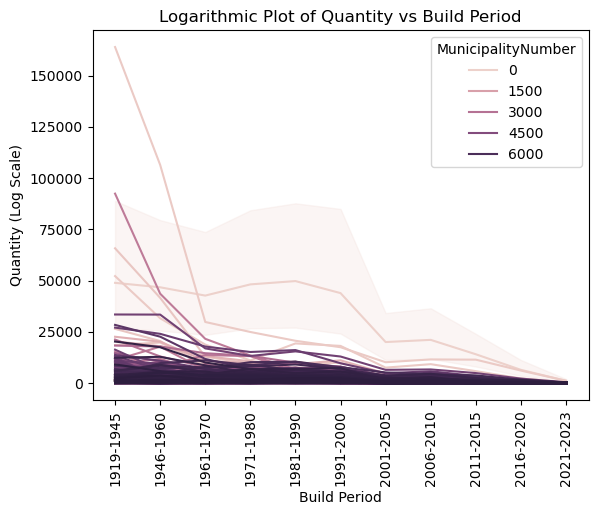

In [12]:

sns.lineplot(data=territory_df[~(territory_df["build_period"]=="Vor 1919")], x="build_period", y="quantity", hue="MunicipalityNumber")

# Set the y-axis to logarithmic scale
#plt.yscale("log")

# Add labels and title (optional)
plt.xlabel("Build Period")
plt.ylabel("Quantity (Log Scale)")
plt.title("Logarithmic Plot of Quantity vs Build Period")
plt.xticks(rotation=90)

In [13]:
# TODO : Are there preestablished indices for Municipality growth..?
